In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv('data-table.csv')

In [3]:
main_df.drop(['URL'], axis=1, inplace=True)

In [4]:
data_df = main_df[main_df['YEAR'] != 2005]

In [5]:
data_df

,YEAR,STATE,RATE,DEATHS
0,2021,AL,26.4,1315
1,2021,AK,25.2,182
2,2021,AZ,18.3,1365
3,2021,AR,23.3,698
4,2021,CA,9.0,3576
...,...,...,...,...
395,2014,VA,10.3,889
396,2014,WA,9.7,702
397,2014,WV,14.6,286
398,2014,WI,8.2,487


In [6]:
grouped_df = data_df.groupby(['YEAR']).agg({'RATE':'mean', 'DEATHS':'sum'})

<AxesSubplot:xlabel='YEAR'>

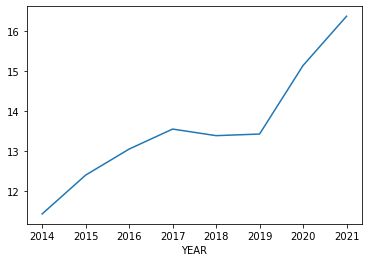

In [7]:
#Sample plot to see the raw RATE data on a graph
grouped_df['RATE'].plot()

In [8]:
state_df = data_df.groupby(['STATE','YEAR']).mean().drop(["DEATHS"], axis = 1)

In [9]:
state_df

RATE
STATE YEAR      
AK    2014  19.2
      2015  23.4
      2016  23.3
      2017  24.5
      2018  21.0
...          ...
WY    2017  18.8
      2018  21.5
      2019  22.3
      2020  25.9
      2021  26.1

[400 rows x 1 columns]

In [10]:
ca_df = state_df.loc['CA']
ca_df

,RATE
YEAR,
2014,7.4
2015,7.7
2016,7.9
2017,7.9
2018,7.5
2019,7.2
2020,8.5
2021,9.0


In [11]:
fl_df = state_df.loc['FL']
fl_df

,RATE
YEAR,
2014,11.5
2015,12.0
2016,12.6
2017,12.4
2018,12.9
2019,12.7
2020,13.7
2021,14.1


In [12]:
ny_df = state_df.loc['NY']
ny_df

,RATE
YEAR,
2014,4.2
2015,4.2
2016,4.4
2017,3.7
2018,4.1
2019,3.9
2020,5.3
2021,5.4


In [13]:
tx_df = state_df.loc['TX']
tx_df

,RATE
YEAR,
2014,10.7
2015,11.7
2016,12.1
2017,12.4
2018,12.2
2019,12.7
2020,14.2
2021,15.6


In [48]:
ne_df = state_df.loc['NE']
ne_df

,RATE
YEAR,
2014,9.5
2015,8.9
2016,9.1
2017,8.3
2018,9.0
2019,10.4
2020,10.1
2021,10.3


In [49]:
nm_df = state_df.loc['NM']
nm_df

,RATE
YEAR,
2014,16.0
2015,18.6
2016,18.1
2017,18.5
2018,20.7
2019,22.3
2020,22.7
2021,27.8


## ARIMA-GARCH

In [14]:
import pmdarima
import arch

In [34]:
arima_model = pmdarima.arima.auto_arima(grouped_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\mlemodel.p

In [35]:
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3587331.847154895
Iteration:      2,   Func. Count:     12,   Neg. LLF: 32.084502708757796
Iteration:      3,   Func. Count:     18,   Neg. LLF: 33.59781951949218
Iteration:      4,   Func. Count:     24,   Neg. LLF: 29.522970543037196
Iteration:      5,   Func. Count:     30,   Neg. LLF: 25.973811561172177
Iteration:      6,   Func. Count:     36,   Neg. LLF: 23.353913998316955
Iteration:      7,   Func. Count:     42,   Neg. LLF: 21.06777168326731
Iteration:      8,   Func. Count:     48,   Neg. LLF: 11.027975855827071
Iteration:      9,   Func. Count:     54,   Neg. LLF: 10.772957398827963
Iteration:     10,   Func. Count:     59,   Neg. LLF: 10.748929848576191
Iteration:     11,   Func. Count:     64,   Neg. LLF: 10.729477053361217
Iteration:     12,   Func. Count:     69,   Neg. LLF: 10.638769984723371
Iteration:     13,   Func. Count:     74,   Neg. LLF: 10.576544158015285
Iteration:     14,   Func. Count:     79,   Neg. LLF: 

In [36]:
#Change n_periods=N to change how many years are being forecasted
#I chose 5 instead of something like 10 since we only have like 8 data points, but feel free to experiment
predicted_mu = arima_model.predict(n_periods=5)

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [38]:
prediction = predicted_mu + predicted_et

In [39]:
prediction

8     16.422250
9     15.995215
10    15.640773
11    15.346586
12    15.102409
dtype: float64

In [40]:
new_data = pd.DataFrame(prediction, columns=['FORECAST'])

In [41]:
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([grouped_df, new_data], ignore_index=False).drop(['DEATHS'], axis=1)
pred_df.index = new_index

In [42]:
pred_df

,RATE,FORECAST
2014,11.440,NaN
2015,12.406,NaN
2016,13.054,NaN
2017,13.552,NaN
2018,13.388,NaN
2019,13.428,NaN
2020,15.134,NaN
2021,16.360,NaN
2022,NaN,16.422250
2023,NaN,15.995215


In [43]:
#Fills the NaN values in FORECAST with the values in RATE so the plot is a continuous line
pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])

In [44]:
#Swaps column order so DataFrame.plot() displays the two lines properly (rate on top of forecast and not forecast on top)
pred_df = pred_df[['FORECAST', 'RATE']]

<AxesSubplot:title={'center':'National Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

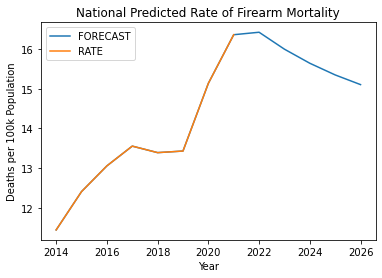

In [45]:
pred_df.plot(title = "National Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22.509184228630062
Iteration:      2,   Func. Count:     13,   Neg. LLF: 274.03634893602805
Iteration:      3,   Func. Count:     19,   Neg. LLF: 953.6739374896785
Iteration:      4,   Func. Count:     25,   Neg. LLF: 5.338907251426648
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4.964141483061669
Iteration:      6,   Func. Count:     35,   Neg. LLF: 4.8480289768302525
Iteration:      7,   Func. Count:     40,   Neg. LLF: 4.690120116902052
Iteration:      8,   Func. Count:     45,   Neg. LLF: 5.3398492515446065
Iteration:      9,   Func. Count:     51,   Neg. LLF: 4.733637713131009
Iteration:     10,   Func. Count:     57,   Neg. LLF: 4.456651708487269
Iteration:     11,   Func. Count:     62,   Neg. LLF: 4.3103146323024735
Iteration:     12,   Func. Count:     67,   Neg. LLF: 4.319907776920905
Iteration:     13,   Func. Count:     73,   Neg. LLF: 4.293812923584492
Iteration:     14,   Func. Count:     78,   Neg. LLF: 4.293

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'California Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

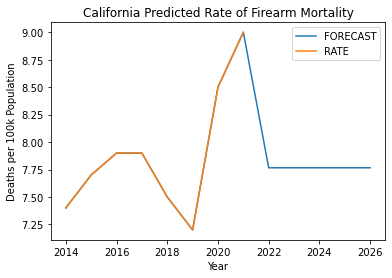

In [33]:
arima_model = pmdarima.arima.auto_arima(ca_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([ca_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]
pred_df.plot(title = "California Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3781331.8676853403
Iteration:      2,   Func. Count:     12,   Neg. LLF: 13.634308193613244
Iteration:      3,   Func. Count:     18,   Neg. LLF: 15.653641258533504
Iteration:      4,   Func. Count:     24,   Neg. LLF: 11.977980231161698
Iteration:      5,   Func. Count:     30,   Neg. LLF: 10.559229450887067
Iteration:      6,   Func. Count:     36,   Neg. LLF: 9.575401122568262
Iteration:      7,   Func. Count:     42,   Neg. LLF: 7.815243788715933
Iteration:      8,   Func. Count:     48,   Neg. LLF: 7.565090954177261
Iteration:      9,   Func. Count:     53,   Neg. LLF: 7.536705134934669
Iteration:     10,   Func. Count:     58,   Neg. LLF: 7.523264790726069
Iteration:     11,   Func. Count:     63,   Neg. LLF: 7.507700092998792
Iteration:     12,   Func. Count:     68,   Neg. LLF: 7.506207728100087
Iteration:     13,   Func. Count:     73,   Neg. LLF: 7.505820476733321
Iteration:     14,   Func. Count:     78,   Neg. LLF: 7.505

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'Florida Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

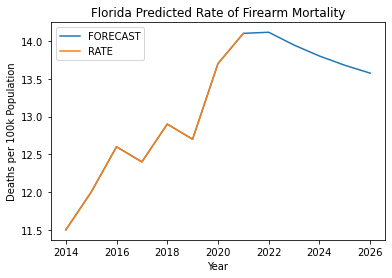

In [32]:
arima_model = pmdarima.arima.auto_arima(fl_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([fl_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]


pred_df.plot(title = "Florida Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year" )

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16.74929470441534
Iteration:      2,   Func. Count:     13,   Neg. LLF: 105.59948851591598
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6.342343056835299
Iteration:      4,   Func. Count:     24,   Neg. LLF: 6.3004272285024605
Iteration:      5,   Func. Count:     29,   Neg. LLF: 6.268425848946882
Iteration:      6,   Func. Count:     34,   Neg. LLF: 6.255681087476788
Iteration:      7,   Func. Count:     39,   Neg. LLF: 6.254264605760127
Iteration:      8,   Func. Count:     44,   Neg. LLF: 6.254224149076839
Iteration:      9,   Func. Count:     48,   Neg. LLF: 6.254224168375232
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.254224149076839
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9


C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'New York Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

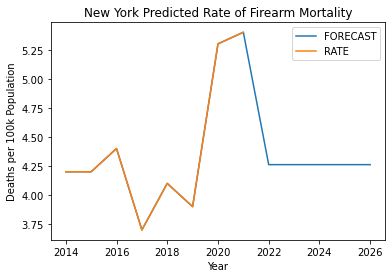

In [46]:
arima_model = pmdarima.arima.auto_arima(ny_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([ny_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]
pred_df.plot(title = "New York Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\mlemodel.p

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3505971.664313037
Iteration:      2,   Func. Count:     12,   Neg. LLF: 11.379723486080279
Iteration:      3,   Func. Count:     18,   Neg. LLF: 46.916507380598595
Iteration:      4,   Func. Count:     24,   Neg. LLF: 37.093821483115306
Iteration:      5,   Func. Count:     30,   Neg. LLF: 26.832265314629385
Iteration:      6,   Func. Count:     36,   Neg. LLF: 11.602643478118548
Iteration:      7,   Func. Count:     42,   Neg. LLF: 18.118426958671492
Iteration:      8,   Func. Count:     48,   Neg. LLF: 11.359601335136183
Iteration:      9,   Func. Count:     54,   Neg. LLF: 11.274806650583551
Iteration:     10,   Func. Count:     59,   Neg. LLF: 11.229718905642141
Iteration:     11,   Func. Count:     64,   Neg. LLF: 11.151795052490023
Iteration:     12,   Func. Count:     69,   Neg. LLF: 10.716782520288449
Iteration:     13,   Func. Count:     74,   Neg. LLF: 10.70879128259389
Iteration:     14,   Func. Count:     80,   Neg. LLF:

C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'Texas Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

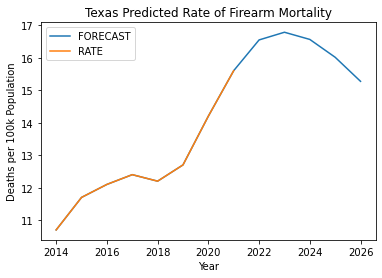

In [47]:
arima_model = pmdarima.arima.auto_arima(tx_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([tx_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]
pred_df.plot(title = "Texas Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21.085606456017302
Iteration:      2,   Func. Count:     12,   Neg. LLF: 19.562297978129436
Iteration:      3,   Func. Count:     17,   Neg. LLF: 19.559048877118194
Iteration:      4,   Func. Count:     22,   Neg. LLF: 19.540998455553844
Iteration:      5,   Func. Count:     27,   Neg. LLF: 19.49359100978738
Iteration:      6,   Func. Count:     32,   Neg. LLF: 19.489487231637945
Iteration:      7,   Func. Count:     38,   Neg. LLF: 19.473108850139162
Iteration:      8,   Func. Count:     43,   Neg. LLF: 19.472753932269434
Iteration:      9,   Func. Count:     48,   Neg. LLF: 19.472749983243922
Iteration:     10,   Func. Count:     52,   Neg. LLF: 19.472749983241137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19.472749983243922
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10


C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'New Mexico Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

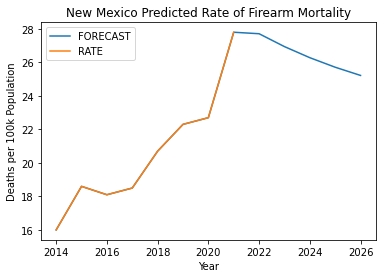

In [50]:
arima_model = pmdarima.arima.auto_arima(nm_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([nm_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]
pred_df.plot(title = "New Mexico Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17.42443261086737
Iteration:      2,   Func. Count:     15,   Neg. LLF: 7.619260515036187
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7.367105121739009
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7.3657344521211305
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7.364710506949725
Iteration:      6,   Func. Count:     36,   Neg. LLF: 7.364633280636504
Iteration:      7,   Func. Count:     41,   Neg. LLF: 7.364617664578796
Iteration:      8,   Func. Count:     46,   Neg. LLF: 7.364614977137844
Iteration:      9,   Func. Count:     50,   Neg. LLF: 7.364614977127148
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.364614977137844
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9


C:\Users\Sean\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:title={'center':'Nebraska Predicted Rate of Firearm Mortality'}, xlabel='Year', ylabel='Deaths per 100k Population'>

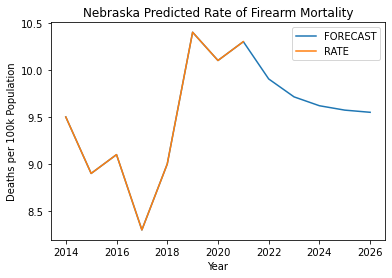

In [51]:
arima_model = pmdarima.arima.auto_arima(ne_df['RATE'])
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()
predicted_mu = arima_model.predict(n_periods=5)

garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

prediction = predicted_mu + predicted_et

new_data = pd.DataFrame(prediction, columns=['FORECAST'])
n = prediction.index[-1] + 1
new_index = pd.Index(range(2014, 2014+n))
pred_df = pd.concat([ne_df, new_data], ignore_index=False)
pred_df.index = new_index

pred_df['FORECAST'] = pred_df['FORECAST'].fillna(pred_df['RATE'])
pred_df = pred_df[['FORECAST', 'RATE']]
pred_df.plot(title = "Nebraska Predicted Rate of Firearm Mortality", ylabel = "Deaths per 100k Population", xlabel= "Year")